In [1]:
using Revise
using BiMDPs

[ Info: Precompiling BiMDPs [8af17bd5-7ea0-4ae2-8fd5-dbf3cdd18bce]


In [2]:
rgw = RoverGridWorld.RoverGridWorldMDP()

BiMDPs.RoverGridWorld.RoverGridWorldMDP
  grid_size: Tuple{Int64, Int64}
  null_state: BiMDPs.RoverGridWorld.State
  p_transition: Float64 0.7
  γ: Float64 0.95
  reward_vals: Dict{Tuple{Int64, Int64}, Float64}


## Test functionality

In [3]:
s0 = RoverGridWorld.State(1,-1)
RoverGridWorld.inbounds(rgw, s0)

false

## Plot rewards grid

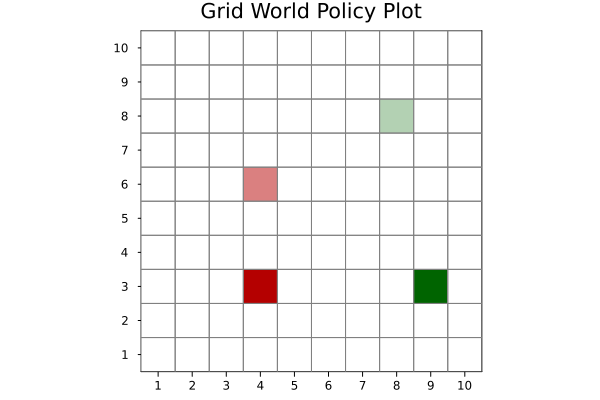

In [4]:
RoverGridWorld.plot_grid_world(rgw)

## Solving using Value Iteration

In [5]:
using POMDPs
using DiscreteValueIteration

In [6]:
using Interact, Plots
# Interact.WebIO.install_jupyter_nbextension() # might be helpful if you see `WebIO` warnings in Jupyter
@manipulate for iter in slider(0:1:50, value = 0), γ_vi in slider(0:0.05:1, value = 0.95)
    rgw = RoverGridWorld.RoverGridWorldMDP(γ = γ_vi)
    solver = ValueIterationSolver(max_iterations=iter);
    policy = POMDPs.solve(solver, rgw);
    RoverGridWorld.plot_grid_world(rgw, policy, iter, rgw.γ)
end

WebIO._IJuliaInit()

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 51, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(1), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\sbanerj6\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\sbanerj6\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\sbanerj6\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\sbanerj6\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\sbanerj6\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x000001ee20508f90, Task (runnable) @0x000001ee20508f90), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (8, 2121841132384, 0)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\

In [7]:
# Save a figure for final rewards
rgw = RoverGridWorld.RoverGridWorldMDP(γ = 0.95)
solver = ValueIterationSolver(max_iterations=50);
policy = POMDPs.solve(solver, rgw);
viz = RoverGridWorld.plot_grid_world(rgw, policy, 50, rgw.γ);
!isdir("imgs") && mkdir("imgs") # create "imgs" directory
savefig(viz, "imgs/gridworld_end_of_VI")

"C:\\Users\\sbanerj6\\.julia\\dev\\BiMDPs\\notebooks\\imgs\\gridworld_end_of_VI.png"

## Animation of evolving value iteration

In [8]:
path = RoverGridWorld.create_value_iteration_gif(rgw)

"gifs/gridworld_vi.gif"

In [9]:
path2 = RoverGridWorld.create_discount_gif()

"gifs/gridworld_vi_γ.gif"

## Solving using Q learning and SARSA

In [10]:
policy = RoverGridWorld.solve_using("vi", rgw);

In [11]:
q_learning_policy = RoverGridWorld.solve_using("qlearning", rgw);

In [12]:
sarsa_policy = RoverGridWorld.solve_using("sarsa", rgw);

## Stepthrough one episode using VI

In [13]:
RoverGridWorld.print_stepthrough(rgw, policy, init_state = RoverGridWorld.State(2,2))

[ Info: In state (2, 2), taking action DOWN, receiving reward 0
[ Info: In state (2, 1), taking action RIGHT, receiving reward 0
[ Info: In state (3, 1), taking action RIGHT, receiving reward 0
[ Info: In state (3, 2), taking action DOWN, receiving reward 0
[ Info: In state (3, 1), taking action RIGHT, receiving reward 0
[ Info: In state (4, 1), taking action RIGHT, receiving reward 0
[ Info: In state (4, 1), taking action RIGHT, receiving reward 0
[ Info: In state (5, 1), taking action RIGHT, receiving reward 0
[ Info: In state (6, 1), taking action RIGHT, receiving reward 0
[ Info: In state (6, 2), taking action RIGHT, receiving reward 0
[ Info: In state (6, 3), taking action RIGHT, receiving reward 0
[ Info: In state (6, 2), taking action RIGHT, receiving reward 0
[ Info: In state (7, 2), taking action RIGHT, receiving reward 0
[ Info: In state (7, 1), taking action RIGHT, receiving reward 0
[ Info: In state (8, 1), taking action UP, receiving reward 0
[ Info: In state (9, 1), takin

In [14]:
steps = RoverGridWorld.collect_stepthrough(rgw, policy, init_state = RoverGridWorld.State(2,2))
file_path = RoverGridWorld.create_simulated_episode_gif(rgw, policy, steps)

"gifs/gridworld_episode.gif"

## Compare different policies

In [15]:
results = RoverGridWorld.run_simulation(rgw, policy, q_learning_policy, sarsa_policy);

N_sim = 10000
window = 500


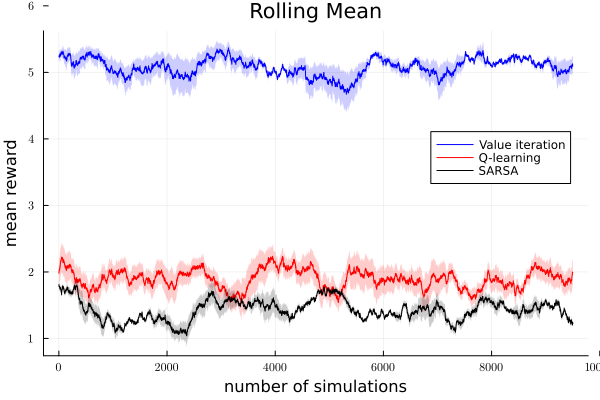

In [16]:
RoverGridWorld.plot_simulation_results(results)